In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

# What can we learn about different hosts and areas?
# What can we learn from predictions? (ex: locations, prices, reviews, etc)
# Which hosts are the busiest and why?
# Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [2]:
path = 'dataset/AB_NYC_2019.csv'
df = pd.read_csv(path)

In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

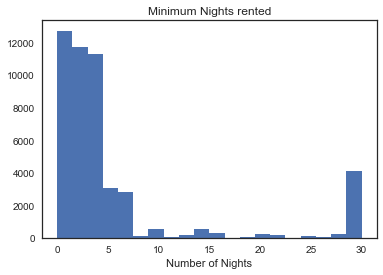

In [28]:
# How many nights people usually rent from Airbnb NYC?
plt.hist(df['minimum_nights'], bins = 20, range=(0,30))
plt.title('Minimum Nights rented')
plt.xlabel('Number of Nights')
plt.show()
# The average location is around 7 days. However, the most frequent rentals are between 2 to 4 days.
# Interesting to notice here is that 30 days rentals occurs frequently.

In [33]:
# Avg of days people stay rented in NYC Airbnb
round(df['minimum_nights'].mean(),1)

7.0

Text(0.5,1,'Rentals per Neighbouhood')

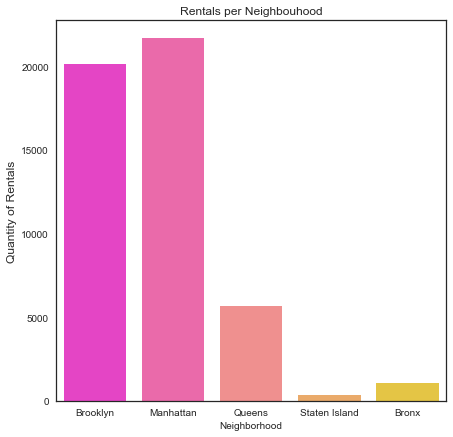

In [44]:
# Where are the most looked nieghborhoods
plt.figure(figsize=(7,7))
g = sns.countplot(x = 'neighbourhood_group', data = df, palette = 'spring')
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.ylabel("Quantity of Rentals", fontdict= {'size':12})
plt.title("Rentals per Neighbouhood")
# Chart shows that Manhattan and Brooklyn are the preferred locations, what makes sense if we consider that those are the most
# wanted places to go in the city for business and/or tourism.

Text(0.5,1,'Prices per Neighbouhood')

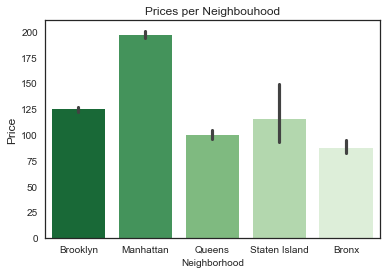

In [47]:
# Prices average by neighbourhood
sns.barplot(data=df, x='neighbourhood_group', y='price', palette = 'Greens_r')
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.ylabel("Price", fontdict= {'size':12})
plt.title("Prices per Neighbouhood")
# We can see that Manhattan and Brooklyn are the most expensives, following the offer X demand rule.

Text(0.5,1,'Rentals by type')

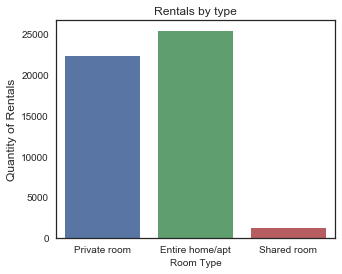

In [6]:
# Type of listings
plt.figure(figsize=(5,4))
g = sns.countplot(x = 'room_type', data = df)
plt.xlabel("Room Type",fontdict= {'size':10})
plt.ylabel("Quantity of Rentals", fontdict= {'size':12})
plt.title("Rentals by type")
# The results show us that usually people rent an entire appartment, but given NYC is an expensive place and also big city, 
# we can also see almost as many people listing a Private Room, probably using it to capitalize empty spaces.

# Which hosts are the busiest and why?

In [179]:
# Most busy hosts
busyHosts = df['host_id'].value_counts() #count how many rents per host_ID
busyHosts = pd.DataFrame(busyHosts)
busyHosts.columns = ['rentals']
busyHosts['hostID'] = busyHosts.index
busyHosts.reset_index(drop=True)

,rentals,hostID
0,327,219517861
1,232,107434423
2,121,30283594
3,103,137358866
4,96,12243051
5,96,16098958
6,91,61391963
7,87,22541573
8,65,200380610
9,52,7503643


In [180]:
#Select only the top 10 renters
busyHosts = busyHosts.head(10)

In [181]:
busyHosts

,rentals,hostID
219517861,327,219517861
107434423,232,107434423
30283594,121,30283594
137358866,103,137358866
12243051,96,12243051
16098958,96,16098958
61391963,91,61391963
22541573,87,22541573
200380610,65,200380610
7503643,52,7503643


Text(0.5,1,'Rentals by hostID (100+ rentals)')

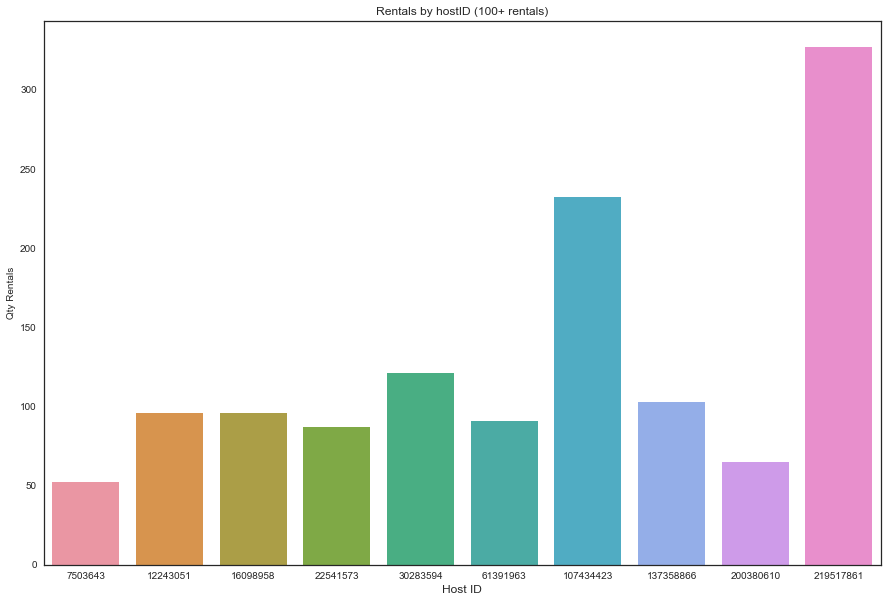

In [186]:
plt.figure(figsize=(15,10))
g = sns.barplot(y='rentals', x= 'hostID', data=busyHosts)
plt.ylabel("Qty Rentals",fontdict= {'size':10})
plt.xlabel("Host ID", fontdict= {'size':12})
plt.title("Rentals by hostID (100+ rentals)")

In [192]:
# Extracting only the Top 10 hosts from DF and put in a DF.
hosts = [219517861,107434423,30283594,137358866,12243051,16098958,61391963,22541573,200380610,7503643]
df2 = df[df['host_id'].isin(hosts)]
df2 = pd.DataFrame(df2)

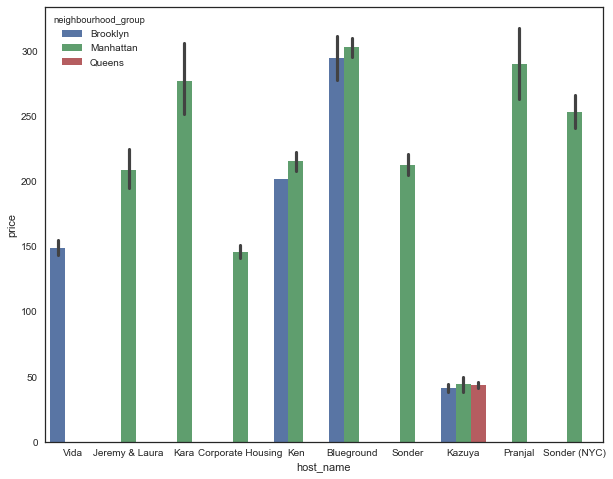

In [198]:
# Where do they have their estates?
plt.figure(figsize=(10,8))
sns.barplot(x='host_name', y='price', data=df2, hue='neighbourhood_group')
# The top 10 renters have their estate in Manhattan and/or Brooklyn areas, confirming that the demand is strong in those locat

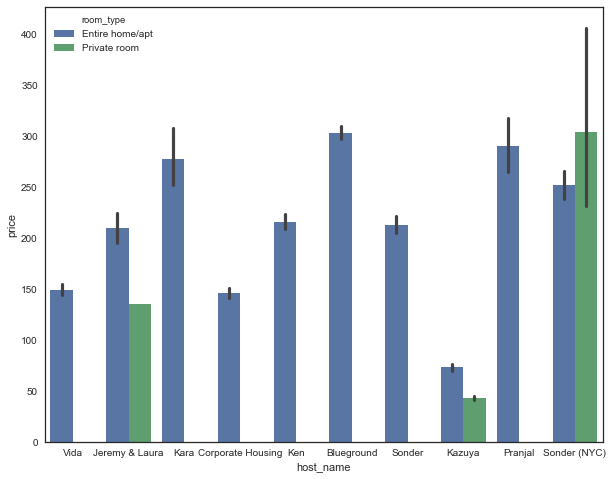

In [200]:
# What kind of property they usually list for renting in Airbnb 
plt.figure(figsize=(10,8))
sns.barplot(x='host_name', y='price', data=df2, hue='room_type')
# The top 10 renters have most of the times the entire appartment for rent.

## Best Qualities for renting

In [11]:
df3 = df.filter(['name','host_id', 'host_name'], axis=1)
df3.head()

,name,host_id,host_name
0,Clean & quiet apt home by the park,2787,John
1,Skylit Midtown Castle,2845,Jennifer
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura


In [29]:
# Extracting the column Name (with qualities from the property) and putting into a list for counting
reps = []
c=0
while c < len(df3):
    try:
        strg = df3['name'][c].split()
    except:
        c=c+1
    for i in strg:
        reps.append(i)
    c=c+1

In [73]:
# Excluding words in, to, of, &, at, from, the
exclude = ['in', 'to', 'of', '&', 'at', 'the', 'from', 'Oh', '2', 'with', 'and','-', 'by', 'THE', 'OF', '1', '+',
           'BR', 'on', 'for', 'Rm', '/', 'w/','w', '*', '!', 'It', 'all','All!', 'Very', 'very', 'you', 'YOU!!', 'a', 'or',
          'room', 'Room', 'bedroom', 'Bedroom', 'near']
for i in reps:
    if i in exclude:
        reps.remove(i)

In [74]:
# Convert all to Lowecase
reps = [x.lower() for x in reps]

In [75]:
repsdf = pd.DataFrame(reps)
repsdf = repsdf[0].value_counts()
graph = pd.DataFrame(repsdf[repsdf>1500])
graph.columns = ['wordCount']
graph['word'] = graph.index
graph.reset_index(drop=True)

,wordCount,word
0,6986,private
1,6112,apartment
2,4634,cozy
3,3773,studio
4,3627,brooklyn
5,3570,apt
6,3387,spacious
7,2966,east
8,2856,manhattan
9,2634,park


Text(0.5,1,'Top property features highlighted by Airbnb users for NYC Rent')

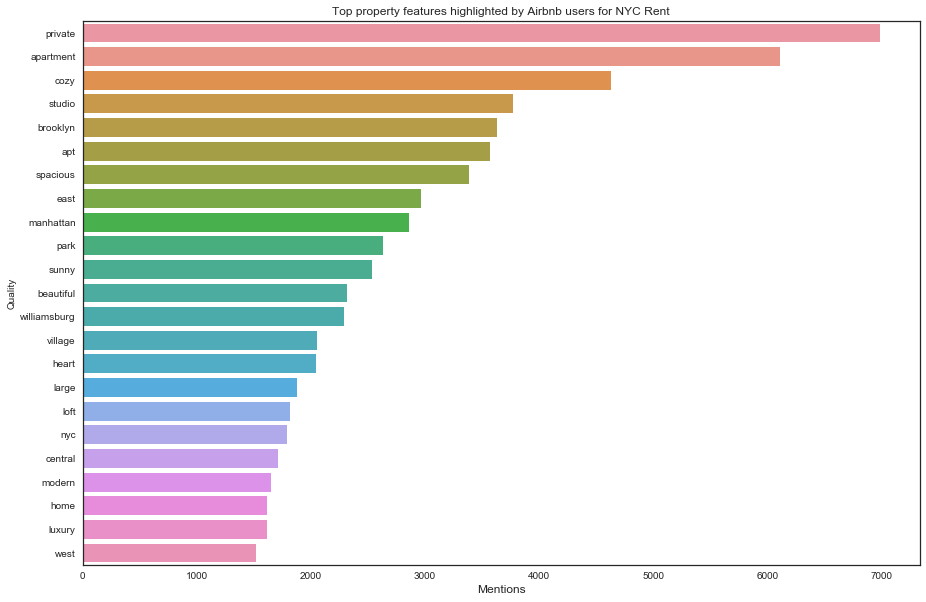

In [76]:
plt.figure(figsize=(15,10))
g = sns.barplot(y='word', x= 'wordCount', data=graph)
plt.ylabel("Quality",fontdict= {'size':10})
plt.xlabel("Mentions", fontdict= {'size':12})
plt.title("Top property features highlighted by Airbnb users for NYC Rent")